<a href="https://colab.research.google.com/github/Tilak46-R/CODING-PRACTICE/blob/main/AB_CAT_PREPARATION_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = {
    "Books": [0,1,2,3,4,5],
    "Total_weight": [2, 3, 4, 5, 6, 7]
}

df = pd.DataFrame(data)
df

,Books,Total_weight
0,0,2
1,1,3
2,2,4
3,3,5
4,4,6
5,5,7


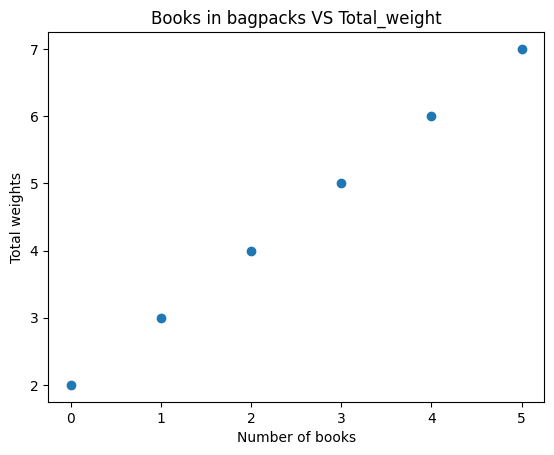

In [ ]:
plt.scatter(df['Books'], df['Total_weight'])
plt.xlabel("Number of books")
plt.ylabel("Total weights")
plt.title("Books in bagpacks VS Total_weight")
plt.show()

In [ ]:
# Performing Linear Regression
# Create a linear regression model

model = LinearRegression()

X = df['Books'].values.reshape(-1,1)
y= df['Total_weight'].values

model.fit(X,y)

df['Predicted_weight']= model.predict(X)

df

,Books,Total_weight,Predicted_weight
0,0,2,2.0
1,1,3,3.0
2,2,4,4.0
3,3,5,5.0
4,4,6,6.0
5,5,7,7.0


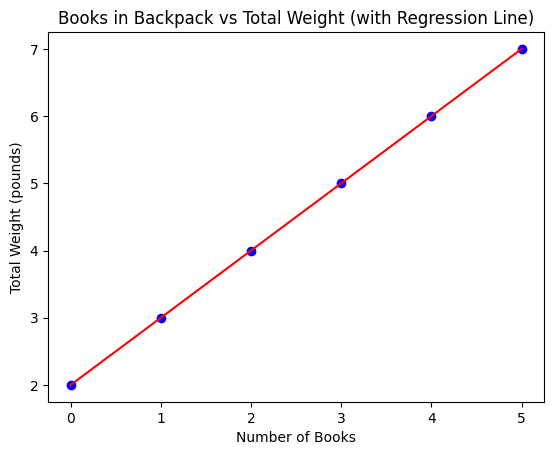

In [ ]:
# Plot the original data and the regression line

plt.scatter(df['Books'], df['Total_weight'], color = 'blue')
plt.plot(df['Books'], df['Predicted_weight'], color = 'red')
plt.xlabel('Number of Books')
plt.ylabel('Total Weight (pounds)')
plt.title('Books in Backpack vs Total Weight (with Regression Line)')
plt.show()

In [ ]:
# Displaying the coefficients of the linear regression model

intercept = model.intercept_
slope = model.coef_[0]

intercept,slope

(2.0000000000000004, 0.9999999999999998)

### **Load and Pre-process your data:**

## **Problem Statement:**

You are tasked with developing a predictive model to estimate the median value of owner-occupied homes (MEDV) in various neighborhoods of Boston. To achieve this, you will use the Boston Housing dataset, which contains various features describing different aspects of the neighborhoods.

**Dataset Description:**

The Boston Housing dataset includes the following features:

1. CRIM: Per capita crime rate by town.
2. ZN: Proportion of residential land zoned for large lots.
3. INDUS: Proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. NOX: Nitrogen oxide concentration (parts per 10 million).
6. RM: Average number of rooms per dwelling.
7. AGE: Proportion of owner-occupied units built before 1940.
8. DIS: Weighted distance to employment centers.
9. RAD: Index of accessibility to radial highways.
10. TAX: Property tax rate.
11. PTRATIO: Pupil-teacher ratio.
12. B: Proportion of residents of African American descent.
13. LSTAT: Percentage of lower status population.

**Objective:**

Your objective is to build a simple linear regression model that predicts the median value of homes (MEDV) based on a single feature, specifically the average number of rooms per dwelling (RM). The goal is to create a model that accurately estimates the MEDV using the RM feature.

**Tasks:**

1. Load the Boston Housing dataset from the provided source.

2. Preprocess the dataset by selecting the RM feature as the independent variable (X) and the MEDV as the dependent variable (y).

3. Split the dataset into training and testing sets (e.g., 80% for training and 20% for testing) to evaluate the model's performance.

4. Develop a simple linear regression model using the training data, where you predict MEDV based on RM.

5. Evaluate the model's performance on the testing data using various metrics such as RMSE, MAE, MAPE, R², and Adjusted R².

6. Visualize the model's predictions by plotting the regression line against the actual data points.

In [ ]:
df = pd.read_csv('/content/Boston_Housing.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [ ]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.shape

(506, 15)

In [ ]:
df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

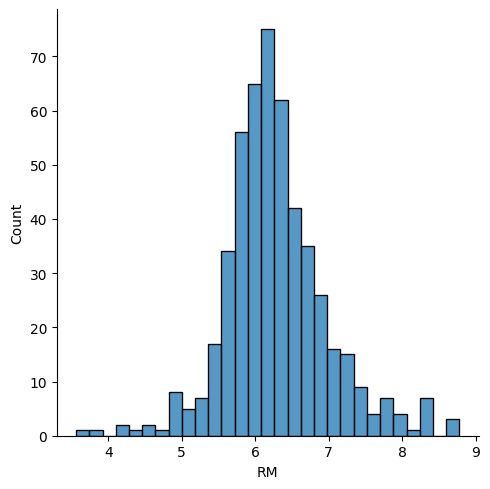

In [ ]:
# distribution of the independent variable

import seaborn as sns
sns.displot(df['RM'])

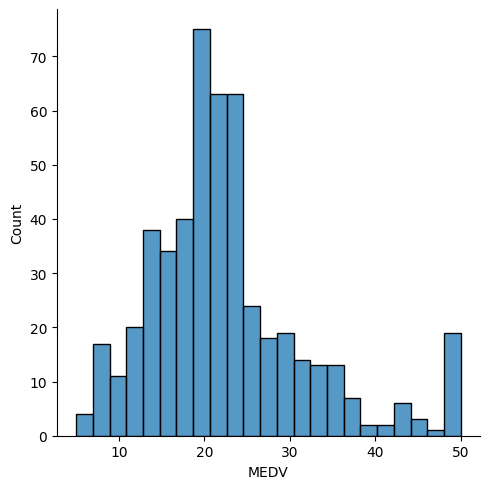

In [ ]:
# distribution of the dependent variable

sns.displot(df['MEDV'])

<Axes: >

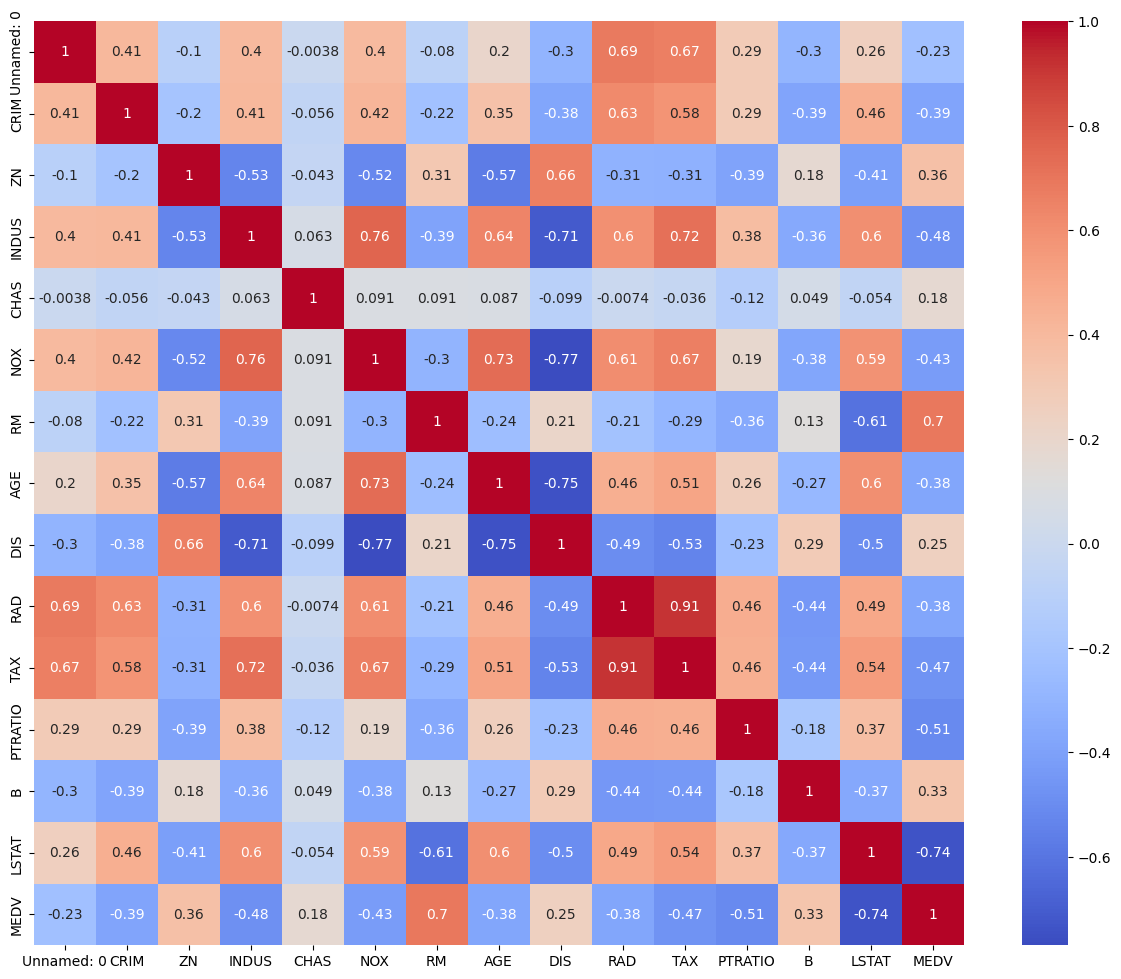

In [ ]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")


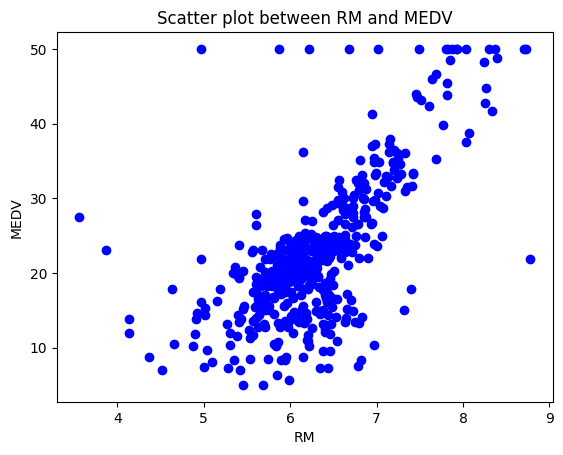

In [ ]:
plt.scatter(df['RM'], df['MEDV'], color = "blue")
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Scatter plot between RM and MEDV')
plt.show()

In [ ]:
X = df[['RM']]
y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Shape of training data
print(X_train.shape)
print(y_train.shape)

(404, 1)
(404,)


In [ ]:
# Training data
print(X_train)
print("----------")
print(y_train)

        RM
477  5.304
15   5.834
332  6.031
423  6.103
19   5.727
..     ...
106  5.836
270  5.856
348  6.635
435  6.629
102  6.405

[404 rows x 1 columns]
----------
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64


In [ ]:
print(X_test.shape)
print(y_test.shape)

(102, 1)
(102,)


In [ ]:
# Testing data
print(X_test)
print("------------")
print(y_test)

        RM
173  6.416
274  6.758
491  5.983
72   6.065
452  6.297
..     ...
412  4.628
436  6.461
411  6.657
86   6.015
75   6.286

[102 rows x 1 columns]
------------
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64


### **Linear Regression Implementation:**

### **Train the Model:**

#### Develop a simple linear regression model using the training data, where you predict MEDV based on RM.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### **Evaluation Metrics for Regression:**

1. **MSE (Mean Squared Error)**:
   - **Description**: MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
   - **Formula**: $( \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2)$
   - **Interpretation**: A lower MSE indicates a better fit. MSE gives more weight to larger errors due to squaring.

In [ ]:
squared_diff = sum((y_test - y_pred)**2)
n = len(y_test)

mse = (squared_diff)/(n)
print("Mean_squared_error", mse)

Mean_squared_error 46.144775347317264


**The same thing we will be doing with the scikit-learn library:**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean sqaured error", round(mse,4))

Mean sqaured error 46.1448


2. **RMSE (Root Mean Squared Error)**:
   - **Description**: RMSE is the square root of the MSE. It measures the standard deviation of the residuals (prediction errors).
   - **Formula**: $( \text{RMSE} = \sqrt{\text{MSE}})$
   - **Interpretation**: RMSE is in the same units as the response variable and is easier to interpret than MSE.

In [ ]:
rmse = np.sqrt(mse)
print(f"root mean squared error {rmse:.2f}")

root mean squared error 6.79


3. **MAE (Mean Absolute Error)**:
   - **Description**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
   - **Formula**: $( \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| )$
   - **Interpretation**: MAE is less sensitive to outliers compared to MSE and RMSE.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error {mae:.2f}")

Mean absolute error 4.48


4. **MAPE (Mean Absolute Percentage Error)**:
   - **Description**: MAPE measures the average magnitude of the errors in percentage terms. It’s particularly useful when you want to interpret the error in terms of percentage.
   - **Formula**: $( \text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|)$
   - **Interpretation**: A lower MAPE value indicates a better fit. MAPE is scale-independent and easy to interpret.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)*100
print(f"Mean absolute percentage error {mape:.2f}")


Mean absolute percentage error 25.21


5. **R² (R-Squared)**:
   - **Description**: R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - **Formula**: $( R^2 = 1 - \frac{\text{Sum of Squared Residuals}}{\text{Total Sum of Squares}})$
   - **Interpretation**: Ranges from 0 to 1. A higher R-squared indicates a better fit but doesn’t guarantee the model is the best. It doesn’t account for overfitting.

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R squared error {r2:.2f}")

R squared error 0.37


#### **Visualize the model's predictions by plotting the regression line against the actual data points:**

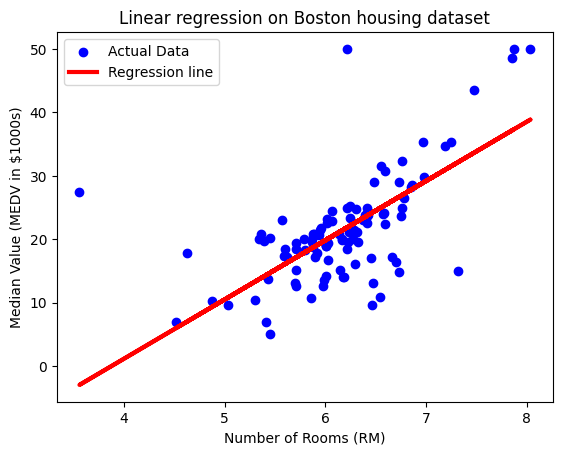

In [ ]:
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual Data')
plt.plot(X_test, y_pred, color = 'red', linewidth = 3, label = 'Regression line')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV in $1000s)')
plt.title('Linear regression on Boston housing dataset')
plt.legend()
plt.show()

# **CLASSIFICATION**

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np


# Sample data (cloudiness, windiness) and labels (0 for no rain, 1 for rain)
# Let's say 0-5 is less likely for rain and 6-10 is more likely for rain
X = np.array([[1, 2], [2, 3], [3, 1], [5, 2], [7, 8], [8, 7], [9, 9], [6, 6]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

df = pd.DataFrame(X, columns = ['cloudiness','windiness'])
df['rain'] = y

df

,cloudiness,windiness,rain
0,1,2,0
1,2,3,0
2,3,1,0
3,5,2,0
4,7,8,1
5,8,7,1
6,9,9,1
7,6,6,1


In [6]:
model = LogisticRegression()

model.fit(X,y)

new_data = np.array([[4,6]])
prediction = model.predict(new_data)
prediction[0]

1

In [8]:
# Retrieve the learned weights (coefficients) and bias (intercept) from the model


weights = model.coef_[0]
bias = model.intercept_[0]

print("weights", weights)
print("Bias", bias)


cloudiness, windiness = 4, 6

# Calculate the linear combination (z)
z = bias + weights[0] * cloudiness + weights[1]*windiness

# Apply the logistic (sigmoid) function to compute the probability

probability_rain = 1 / (1 + np.exp(-z))

print("probability of rain", probability_rain)

weights [0.53298223 0.82509307]
Bias -6.404848430627816
probability of rain 0.6632115264942609


Let us now start implementing what we learned from the previous section into python codes. We will use the Telco Customer Churn data.

### <b>What is Churn Prediction? </b>

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the customer gives up the product or service.

### <b>About Data </b>

* customerID : Customer ID
* gender : Whether the customer is a male or a female
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn : Whether the customer churned or not (Yes or No)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset size")
print("Rows{} columns{}" .format(df.shape[0], df.shape[1]))

Dataset size
Rows7043 columns21


In [15]:
pd.DataFrame(df.dtypes).rename(columns = {0 : "dtype"})

,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


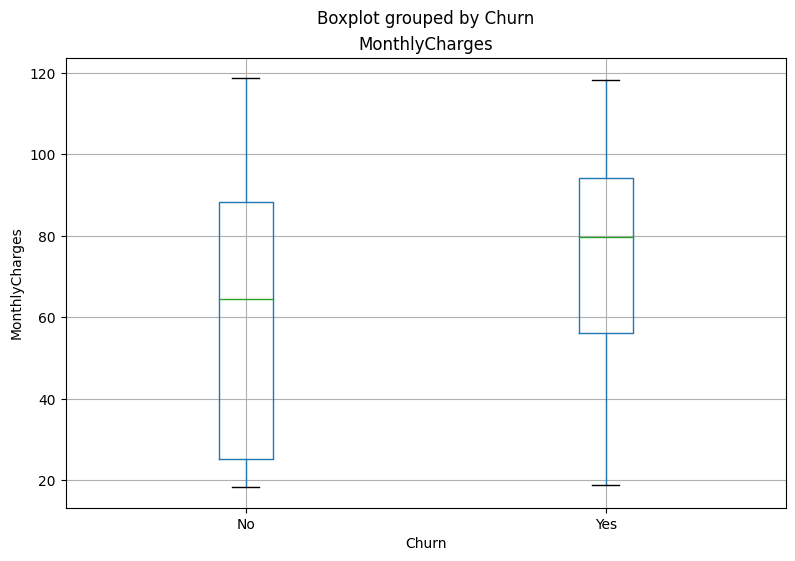

In [18]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

People who have Monthlycharges more than 80 have churned and people with Monthlycharges of less than 80 have not churned.

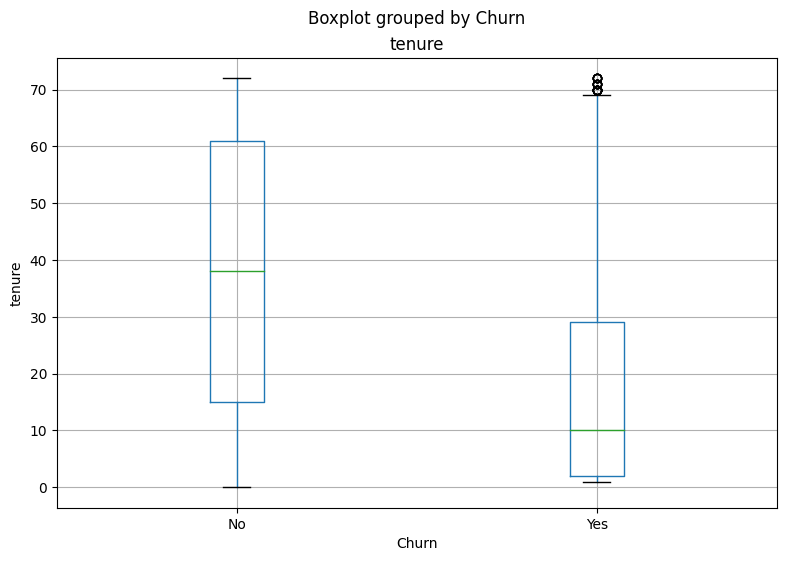

In [25]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel('tenure')
plt.show()

People who have tenure less than 30 have churned and people with tenure of more than 30 have not churnes.

In [27]:
df['class']= df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

X =df[['tenure','MonthlyCharges']]
y = df['class'].copy()

In [26]:
df.shape

(7043, 21)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [31]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [32]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

In [33]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [34]:
# Get the model coefficients and intercept
print(clf.coef_)
print(clf.intercept_)

[[-0.05646728  0.03315385]]
[-1.77408975]


In [36]:
# Get the predicted probabilities

train_probs = clf.predict_proba(X_train)
test_probs = clf.predict_proba(X_test)

In [37]:
# Get the predicted classes

train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

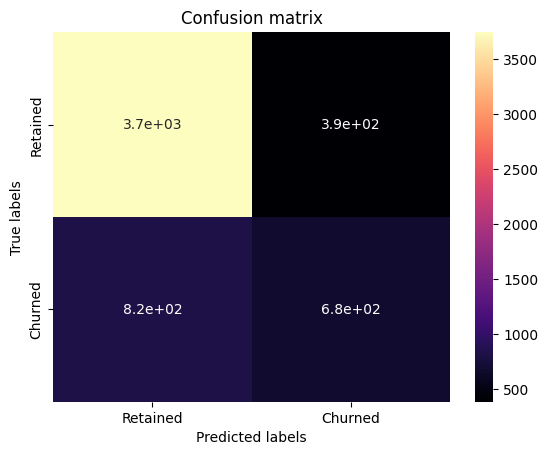

In [41]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train , train_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot = True , cmap = 'magma' , ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

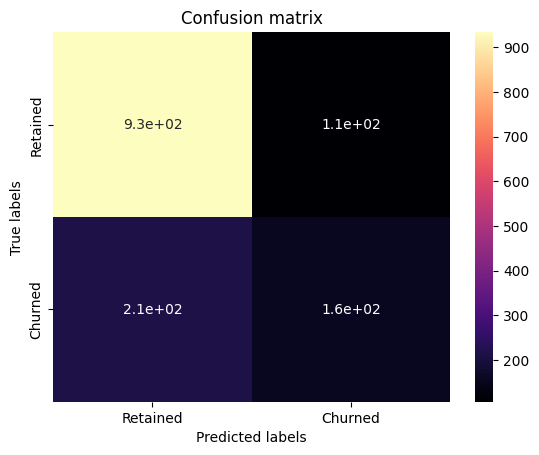

In [42]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test , test_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot = True , cmap = 'magma' , ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)